In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False

In [3]:
sns.set(rc={'figure.figsize':(16,10)})

In [4]:
def data_start(label):
    f = uproot.pandas.iterate("../outputs/"+label+"/*.root", "t")
    data = pd.concat([j for j in f])[['label', 'be', 'm', 'proc', 'chi', 'm_rec']]
    return data

In [5]:
def label2index(data):
    data.index = np.round(data.label, 2)
    data.drop(['label'], axis=1, inplace=True)

In [6]:
data11 = data_start('11')
label2index(data11)

In [7]:
data12 = data_start('12')
label2index(data12)

In [8]:
data17 = data_start('17')
label2index(data17)

In [9]:
data19 = data_start('19')
label2index(data19)

In [10]:
dataM = data_start('model')
label2index(dataM)

In [11]:
np.sort( dataM.index.unique().values )

array([ 508.6,  550. ,  562.5,  575. ,  587.5,  600. ,  612.5,  625. ,
        637.5,  650. ,  662.5,  675. ,  687.5,  700. ,  712.5,  725. ,
        737.5,  750. ,  762.5,  775. ,  787.5,  800. ,  812.5,  825. ,
        837.5,  850. ,  862.5,  875. ,  887.5,  900. ,  912.5,  925. ,
        935. ,  945. ,  950. ,  962.5,  975. ,  987.5, 1000. ])

In [14]:
data19.query('chi<5&abs(m_rec-497.6)<10&proc!=2').groupby('label').agg(np.size)

,be,m,proc,chi,m_rec
label,,,,,
537.5,146.0,146.0,146,146.0,146.0
550.0,141.0,141.0,141,141.0,141.0
562.5,70.0,70.0,70,70.0,70.0
575.0,48.0,48.0,48,48.0,48.0
587.5,46.0,46.0,46,46.0,46.0
600.0,23.0,23.0,23,23.0,23.0
612.5,25.0,25.0,25,25.0,25.0
625.0,19.0,19.0,19,19.0,19.0
637.5,11.0,11.0,11,11.0,11.0


In [13]:
data_prep = data19

In [10]:
data_prep = data17
cnct = [ ([637.5, 650., 641.], 641 ), ([837.5,  850. , 840], 840), ([700, 725], 720), ([862.5, 860.], 860),
        ([875., 887.5,  900., 870., 880., 890.], 870), ([910, 930, 936, 937, 937.5, 938.3, 
        938.9, 939.6, 940.2, 940.8, 942., 912.5,  925. ,  935. ,  945. ,  950.], 940),
        ([971, 981, 990, 1003.5, 975, 987.5, 1000], 970)
        ]#17year

In [38]:
data_prep = data12
cnct = [ ([640.], 650),  ([675., 680., 687.5], 675), ([712.5,  725. , 720.], 720), 
          ([762.5, 760], 760), ([ 787.5,  812.5, 800.], 800), ([837.5,  850., 840], 840),
       ([862.5, 860], 860), ([912.5,  925., 920], 920), ([935, 936], 936), ([945. , 962.5, 950], 950),
       ([962.5,  975. ,970],970),([987.5, 980], 980), ([990.,1000], 990) ] #12year

In [ ]:
data_prep = data12 #merged variant
cnct = [ ([640.], 650),  ([675., 680., 687.5], 675), ([712.5,  725. , 720.], 720), 
          ([762.5, 760], 760), ([ 787.5,  812.5, 800.], 800), ([837.5,  850., 840, 862.5, 860], 850), 
        ([912.5,  925., 920, 935, 936], 930), 
        ([945. , 962.5, 950, 962.5,  975. ,970],960),([987.5, 980, 990.,1000], 985) ] #12year

In [16]:
data_prep = data11
cnct = [ ([900.0, 912.5, 925.0, 935.0, 945., 950.0, 962.5, 975.0, 987.5, 1000.0], 950), 
       ([862.5, 875.0, 887.5, 825.0, 837.5, 850.0], 850), ([800.0, 812.5, 775.0, 787.5], 800),
       ([725.0, 737.5, 750.0, 762.5], 740), ([662.5, 675.0, 687.5, 700.0, 712.5], 680),
       ([625.0, 637.5, 650.0], 637)] #11year

In [39]:
data_prep['label'] = data_prep.index
dataM['label'] = dataM.index
#cnct = [ ([936.0, 950.0, 960., 970., 980., 990.], 970) ] #12year

for c in cnct:
    data_prep.label.replace(c[0], c[1], inplace=True)
    dataM.label.replace(c[0], c[1], inplace=True)
data_prep.index = data_prep.label
data_prep.drop(['label'], axis=1, inplace=True)

dataM.index = dataM.label
dataM.drop(['label'], axis=1, inplace=True)

In [15]:
chiCut = 10
massCut = 100

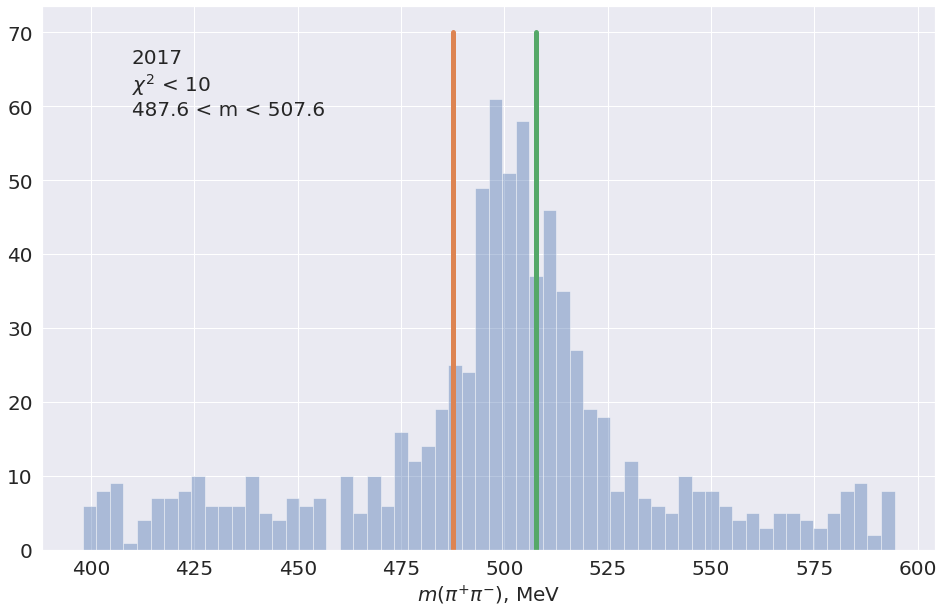

In [16]:
sns.distplot(data17.query('chi<@chiCut&abs(m_rec-497.6)<@massCut&proc!=2')['m_rec'], kde=False, bins=60)
plt.plot(np.ones(2)*487.6, np.linspace(0,70,2), linewidth=5);
plt.plot(np.ones(2)*507.6, np.linspace(0,70,2), linewidth=5);
ax = plt.gca()
plt.xlabel("$m(\pi^{+}\pi^{-})$, MeV", fontsize=20);
ax.tick_params(labelsize=20)
lab = "2017\n$\chi^{2}$ < 10\n487.6 < m < 507.6"
ax.text(0.1, 0.8, lab, fontsize=20, transform=ax.transAxes);
#plt.savefig('17Cut.png', dpi=300)

In [38]:

dt1 = data11.query('proc!=1&abs(m-497.6)<@massCut')[['m']].groupby('label').agg(np.size)
dt1['type'] = 'standard'

In [39]:
dt2 = data11.query('proc!=2&abs(m_rec-497.6)<@massCut&chi<@chiCut')[['m_rec']].groupby('label').agg(np.size)
dt2.columns = ['m']
dt2['type'] = 'kinfit'

In [40]:
dt3 = data11.query('proc==3&abs(m_rec-497.6)<@massCut&chi<@chiCut')[['m_rec']].groupby('label').agg(np.size)
dt3.columns = ['m']
dt3['type'] = 'both'

In [219]:
dt11 = dt1.append(dt2).append(dt3)

In [220]:
dt11 = pd.pivot_table(dt11, values=['m'], index=['label'], columns=['type'])

In [221]:
dt11['Rec'] = dt11[('m','both')]/dt11[('m','kinfit')]

In [222]:
dt11.columns = ['Nb', 'Nk', 'Ns', 'rec']
dt11['N0'] = dt11['Nk']*dt11['Ns']/dt11['Nb']
dt11['errS'] = np.sqrt( (dt11.Nb+1)*(dt11.Nb+2)/(dt11.Nk+2)/(dt11.Nk+3) - np.square((dt11.Nb+1)/(dt11.Nk+2)) )

In [223]:
dt11

,Nb,Nk,Ns,rec,N0,errS
label,,,,,,
525.0,76.0,93.0,758.0,0.817204,927.552632,0.039997
537.5,106.0,113.0,843.0,0.938053,898.669811,0.023622
550.0,60.0,66.0,349.0,0.909091,383.900000,0.036583
562.5,58.0,59.0,365.0,0.983051,371.293103,0.022616
575.0,31.0,31.0,130.0,1.000000,130.000000,0.029398
587.5,28.0,29.0,153.0,0.965517,158.464286,0.043429
600.0,14.0,14.0,77.0,1.000000,77.000000,0.058709
612.5,21.0,21.0,113.0,1.000000,113.000000,0.041627
637.0,24.0,28.0,140.0,0.857143,163.333333,0.066935


In [224]:
dt1 = dataM.query('proc!=1&abs(m_rec-497.6)<@massCut')[['m']].groupby('label').agg(np.size)
dt1['type'] = 'standard'

In [225]:
dt2 = dataM.query('proc!=2&abs(m_rec-497.6)<@massCut&chi<@chiCut')[['m_rec']].groupby('label').agg(np.size)
dt2.columns = ['m']
dt2['type'] = 'kinfit'

In [226]:
dt3 = dataM.query('proc==3&abs(m_rec-497.6)<@massCut&chi<@chiCut')[['m_rec']].groupby('label').agg(np.size)
dt3.columns = ['m']
dt3['type'] = 'both'

In [227]:
dtM = dt1.append(dt2).append(dt3)

In [228]:
dtM = pd.pivot_table(dtM, values=['m'], index=['label'], columns=['type'])

In [229]:
dtM['Rec'] = dtM[('m','both')]/dtM[('m','kinfit')]

In [230]:
dtM.columns = ['Nb', 'Nk', 'Ns', 'rec']
dtM['N0'] = dtM['Nk']*dtM['Ns']/dtM['Nb']
dtM['errS'] = np.sqrt( (dtM.Nb+1)*(dtM.Nb+2)/(dtM.Nk+2)/(dtM.Nk+3) - np.square((dtM.Nb+1)/(dtM.Nk+2)) )

In [231]:
dtM

,Nb,Nk,Ns,rec,N0,errS
label,,,,,,
550.0,187.0,201.0,356.0,0.930348,382.652406,0.018315
562.5,187.0,201.0,334.0,0.930348,359.005348,0.018315
575.0,159.0,173.0,273.0,0.919075,297.037736,0.021101
587.5,155.0,164.0,275.0,0.945122,290.967742,0.018412
600.0,123.0,134.0,231.0,0.917910,251.658537,0.024233
612.5,128.0,137.0,210.0,0.934307,224.765625,0.021838
637.0,285.0,306.0,508.0,0.931373,545.431579,0.014651
680.0,355.0,397.0,609.0,0.894207,681.050704,0.015504
740.0,328.0,367.0,591.0,0.893733,661.271341,0.016162


In [232]:
recEff = pd.DataFrame({'Rec': dt11['rec']/dtM['rec']})
recEff['Err'] = recEff['Rec']*np.sqrt( (dt11['errS']/dt11['rec'])**2 + (dtM['errS']/dtM['rec'])**2)

In [233]:
recEff = recEff.dropna()

In [234]:
recEff

,Rec,Err
label,,
550.0,0.977151,0.043775
562.5,1.056648,0.031994
575.0,1.088050,0.040586
587.5,1.021580,0.050075
600.0,1.089431,0.070128
612.5,1.070312,0.051097
637.0,0.920301,0.073311
680.0,0.852046,0.101320
740.0,0.969715,0.102056


In [235]:
print(plt.style.available)

['seaborn-notebook', 'seaborn-talk', 'seaborn-whitegrid', 'seaborn-poster', 'dark_background', 'seaborn-deep', 'seaborn-colorblind', 'seaborn-paper', 'Solarize_Light2', 'fivethirtyeight', 'seaborn-white', 'tableau-colorblind10', 'seaborn-pastel', '_classic_test', 'seaborn-darkgrid', 'fast', 'seaborn-bright', 'grayscale', 'seaborn', 'seaborn-dark-palette', 'classic', 'seaborn-ticks', 'seaborn-muted', 'ggplot', 'seaborn-dark', 'bmh']


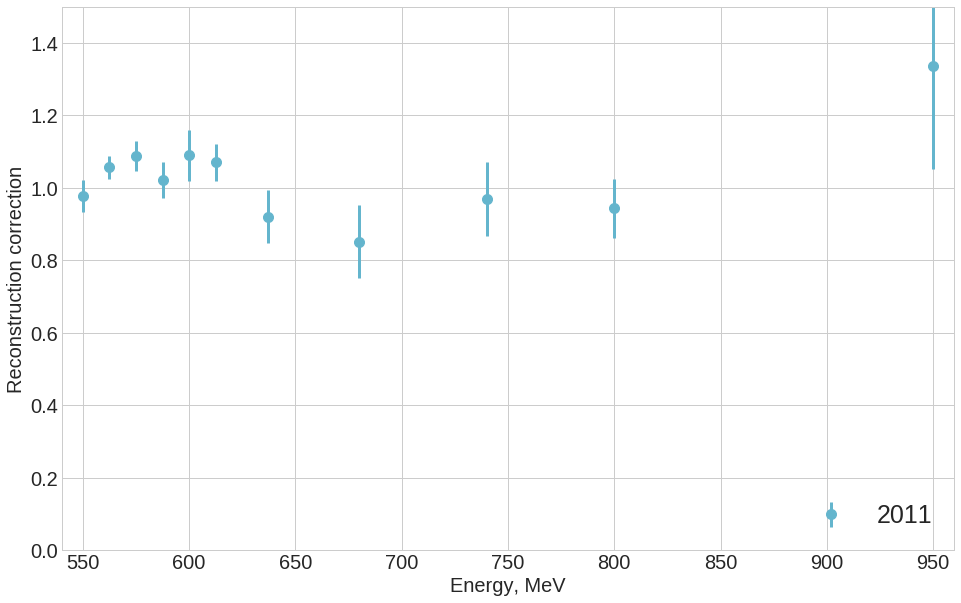

In [236]:
plt.style.use('seaborn-whitegrid')
plt.errorbar(recEff.index, recEff.Rec, yerr=recEff.Err, fmt='oc', elinewidth=3, ms=10, label="2011");
#plt.errorbar(dtM.index, dtM.Rec, yerr=dtM.errS, fmt='.k');
#plt.errorbar(dt11.index, dt11.Rec, yerr=dt11.errS, fmt='.k', ecolor='green');
ax = plt.gca()
ax.set_ylim([0,1.5])
ax.set_xlim([540,960])
plt.tick_params(labelsize=20);
plt.xlabel("Energy, MeV", fontsize=20);
plt.ylabel("Reconstruction correction", fontsize=20);
plt.legend(fontsize=25, loc="lower right");
#plt.savefig("rec_corr.svg", format="svg")

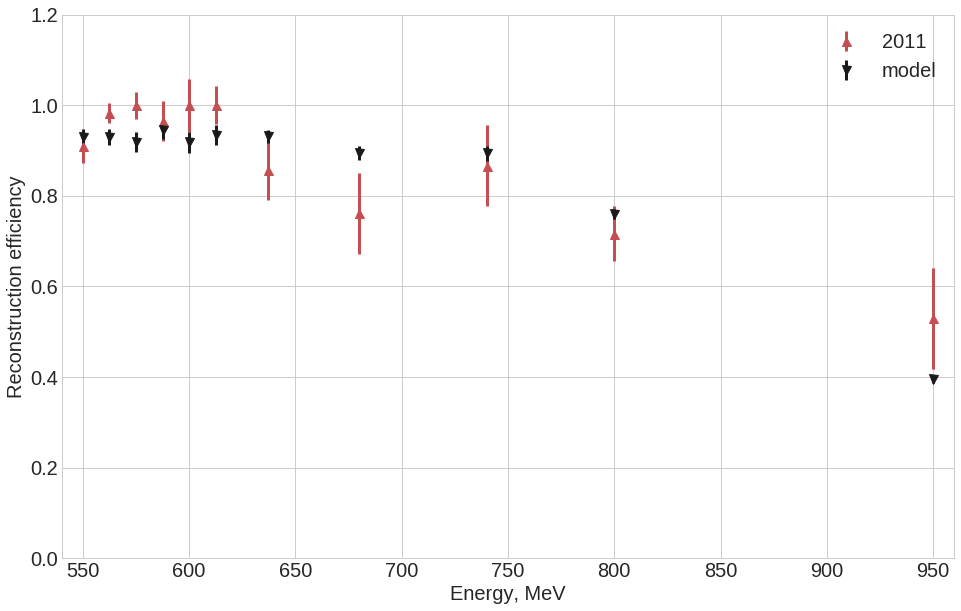

In [237]:
#plt.errorbar(recEff.index, recEff.Rec, yerr=recEff.Err, fmt='.k');
plt.errorbar(dt11.index, dt11.rec, yerr=dt11.errS, fmt='^r', elinewidth=3, ms=9, label="2011");
plt.errorbar(dtM.index, dtM.rec, yerr=dtM.errS, fmt='vk', elinewidth=3, ms=9, label="model");
ax = plt.gca()
ax.set_ylim([0,1.2])
ax.set_xlim([540,960])
#ax.set_title("Efficiencies");
plt.tick_params(labelsize=20);
plt.xlabel("Energy, MeV", fontsize=20);
plt.ylabel("Reconstruction efficiency", fontsize=20);
plt.legend(fontsize=20, loc='upper right');
#plt.savefig("test.svg", format="svg", dpi=300)

In [10]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from iminuit import Minuit
%load_ext Cython

In [31]:
def data_cleaner(data, massCut, chiCut):
    cutKf = "(proc==1&abs(m_rec-497.6)<@massCut&chi<@chiCut)"
    cutBt = "(proc==3&abs(m_rec-497.6)<@massCut&chi<@chiCut)"
    data = data.assign(energy=data.index).query(cutKf+'|' +cutBt).drop(['m', 'be'], axis=1)
    data = data.groupby(['energy', 'proc'], as_index=False).agg({'m_rec':np.size})
    data = pd.pivot_table(data, columns=['proc'], index=['energy'], values=['m_rec']).fillna(0)
    data.columns = ['kf', 'bt']
    data['kf'] = data.kf + data.bt
    data['rec'] = (data.bt+1)/(data.kf+2)
    data['err'] = np.sqrt( (data.bt+1)*(data.bt+2)/(data.kf+2)/(data.kf+3) - np.square((data.bt+1)/(data.kf+2)) )
    #data['err'] = data['rec']*np.sqrt( (1/data.kf) + (1/data.bt))
    return data

def workbook(data_exp, data_model, chiCut=10, massCut=10):
    
    def chiSq(c):
        chi = np.sum( np.square((recEff.rec - c)/recEff.err) )
        #print(chi)
        return chi

    data = data_exp.copy()
    dtM = data_model.copy()
    
    dtM = data_cleaner(dtM, massCut, chiCut)
    data = data_cleaner(data, massCut, chiCut)
    
    recEff = pd.DataFrame({'rec': data['rec']/dtM['rec']})
    recEff['err'] = recEff['rec']*np.sqrt( (data['err']/data['rec'])**2 + (dtM['err']/dtM['rec'])**2)
    recEff['one'] = 1
    fit = Minuit(chiSq, c=0.4, error_c=0.1, errordef=1)
    fit.migrad()
    
    fig = plt.figure(figsize=(16,14))
    
    ax1 = fig.add_subplot(211)
    ax1.errorbar(data.index*2e-3, data.rec, yerr=data.err, fmt='^r', elinewidth=3, ms=9, label="2012")
    ax1.errorbar(dtM.index*2e-3, dtM.rec, yerr=dtM.err, fmt='vk', elinewidth=3, ms=9, label="MC")
    ax1.set_xlim([510*2e-3, 1010*2e-3])
    ax1.set_ylim([0,1.1])
    plt.xlabel("$\sqrt{s}$, GeV", fontsize=20);
    plt.ylabel("Reconstruction efficiency", fontsize=20);
    ax1.tick_params(labelsize=20)
    ax1.legend(fontsize=25, loc="lower left");
    
    ax2 = fig.add_subplot(212)
    ax2.plot(recEff.index*2e-3, recEff.one*fit.values[0], lw=5, label=None)
    lab = ' c = {:.3f} $\pm$ {:.3f} \n $\chi^2 = {:.3f}$'.format(fit.values[0], fit.errors[0], chiSq(fit.values[0]))
    ax2.text(0., 0.8, lab, fontsize=20, transform=ax2.transAxes)
    ax2.errorbar(recEff.index*2e-3, recEff.rec, yerr=recEff.err, fmt='^r', elinewidth=3, ms=9, label="Correction")
    ax2.set_xlim([510*2e-3, 1010*2e-3])
    ax2.set_ylim([max(fit.values[0]-0.6, 0), fit.values[0]+0.8])
    plt.xlabel("$\sqrt{s}$, GeV", fontsize=20);
    plt.ylabel("Reconstruction correction", fontsize=20);
    ax2.tick_params(labelsize=20)
    #ax2.legend(fontsize=25, loc="upper left");
    
    #plt.savefig('11.svg')
    plt.savefig('12.png', dpi=300)
    return

In [40]:
interact_manual(workbook, chiCut=widgets.IntSlider(min=0, max=20, step=1, value=10),
         massCut=widgets.IntSlider(min=0, max=50, step=1, value=10),
         data_exp=fixed(data12), data_model = fixed(dataM));

interactive(children=(IntSlider(value=10, description='chiCut', max=20), IntSlider(value=10, description='mass…